## Libraries

In [1]:
import os
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
import tqdm.notebook as tqdm

from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

import catboost
from catboost import Pool, CatBoostClassifier
import xgboost
from xgboost import XGBClassifier
import lightgbm
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from flaml import AutoML
from sklearn.ensemble import StackingClassifier

## Config

In [2]:
class Config:
    """
        Класс конфигураций
    """
    def __init__(self, train_path, test_path, test_size=0.25, 
                 shuffle=False, target_name=None, id_name=None):
        self.train_path = train_path
        self.test_path = test_path

        self.test_size = test_size
        self.shuffle = shuffle
        
        self.target_name = target_name
        self.id_name = id_name


In [3]:
params = dict(
    train_path="train.csv",
    test_path="test.csv",
    
    test_size=0.25,
    
    # Другие параметры (если нужны):
    target_name='SalePrice',
    id_name='Id'
)

config = Config(**params)

## Data Handling

In [4]:
class DataHandling:
    """
        Class for Data preprocessing
    """
    def __init__(self):
        # Исходные данные !Нельзя менять!
        self.src_train_df = pd.read_csv(config.train_path)
        self.src_test_df = pd.read_csv(config.test_path)
        
        # Данные с предобработкой
        self.train_df = pd.read_csv(config.train_path)
        self.test_df = pd.read_csv(config.test_path)
        
        # Вспомогательные данные
        self.target_name = config.target_name
        self.id_name = config.id_name
        
        # --- Важно! ---
        # Все написанные тобой методы (например your_method)
        # Должны использовать исходные `self.src_train_df` и `self.src_test_df`
        # И применяться к `self.train_df` и `self.test_df` ниже (по очереди)
        # self.your_method(self, fillna_value=100)
        ...  # Остальные методы
        
    def your_method(self, fillna_value):
        """
            Пример твоего кастомного метода, который использует исходные train_df и test_df
        """
        # Копируем исходные данные
        train_data = self.src_train_df.copy()
        test_data = self.src_test_df.copy()
        
        # Предобрабатываем по своей хотелке и записываем результат в self.train_df и self.test_df
        self.train_df['Price'] = train_data['Price'].fillna(fillna_value)
        self.test_df['Price'] = test_data['Price'].fillna(fillna_value)
    
    def get_source_data(self):
        """
            Метод для получения исходных данных
        """
        return self.src_train_df.copy(), self.src_test_df.copy()
        
    def get_train_data(self):
        """
            Метод для получения тренировочных данных
        """
        data = self.train_df.copy()
        self.X = data.drop(columns=[self.target_name, self.id_name])
        self.y = data[self.target_name]
        return self.X, self.y
    
    def get_test_data(self):
        """
            Получение тестовой выборки для предсказания
        """
        data = self.test_df.copy()
        self.X = data.drop(columns=[self.id_name])
        return self.X
    
    def get_test_id(self):
        """
            Получение id для сабмита
        """
        if self.id_name is None:
            print("Нет ID в тестовой выборке!")
            return None
        else:
            return self.test_df[self.id_name]
        
    def get_train_test_split(self, test_size=config.test_size, shuffle=config.shuffle):
        """
            Разбиение на обучающую и отложенную выборки:
            -- С параметрами в зависимости от конфигураций
        """
        X, y = self.get_train_data()
        return train_test_split(X, y, test_size=test_size, shuffle=shuffle)


In [5]:
dataset = DataHandling()

In [6]:
src_train, src_test = dataset.get_source_data()
src_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
# Выборки для обучения и валидации
X_train, X_holdout, y_train, y_holdout = dataset.get_train_test_split()
X_train.shape, X_holdout.shape

((1095, 79), (365, 79))

In [8]:
# Полная (обучающая) выборка
X, y = dataset.get_train_data()

In [9]:
# Тестовая выборка для предикта
X_test = dataset.get_test_data()
id_test = dataset.get_test_id()

## EDA для исходных/предобработанных данных

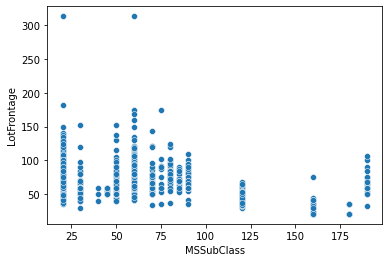

In [10]:
sns.scatterplot(data=X, x='MSSubClass', y='LotFrontage');

In [11]:
...

Ellipsis

## Baseline (Применение моделей)

In [12]:
...

Ellipsis